In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn import svm

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,mean_squared_error, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

import warnings
warnings.filterwarnings('ignore')

In [66]:
df = pd.read_csv('all_combined_annual_death_by_cause.csv')

In [67]:
df.head()

,country,code,year,meningitis,neoplasms,fire_heat_hot_substances,malaria,drowing,interpersonal_violence,hiv_aids,...,chronic_kidney_disease,chronic_respiratory_deasease,cirrohosis_liver_deasease,digestive_disease,acute_hepatitis,alzhimers_disease,parkinsons_disease,PopTotal,gdp-per-capita,continent
0,Afghanistan,AFG,2007,2932.558591,15924.782541,481.219817,392.942607,2126.788535,3657.205757,148.276329,...,4490.174240,7221.773068,3345.814979,6457.753476,3437.0,1402.0,450.0,27100.542,1460.825751,Asia
1,Afghanistan,AFG,2008,2730.846137,16147.839026,462.180576,254.703403,1973.375893,3784.702895,157.401135,...,4533.825139,7142.796656,3316.354776,6407.964590,3005.0,1424.0,455.0,27722.281,1484.114461,Asia
2,Afghanistan,AFG,2009,2460.186423,16382.558546,448.300264,239.035635,1852.155239,3874.099828,167.270695,...,4596.974422,7045.249090,3291.158847,6358.027600,2663.0,1449.0,460.0,28394.806,1758.904477,Asia
3,Afghanistan,AFG,2011,2326.767573,17093.515668,447.884354,390.060248,1774.968476,4169.873038,183.816343,...,4784.629776,6915.563606,3317.891662,6370.000383,2365.0,1508.0,473.0,30117.411,1904.559926,Asia
4,Afghanistan,AFG,2012,2254.492968,17521.930189,445.226412,93.894201,1715.864705,4244.671108,190.525008,...,4845.667028,6877.511217,3352.846566,6398.171770,2264.0,1544.0,482.0,31161.378,2075.491614,Asia


In [68]:
df.dropna(inplace = True)

In [69]:
df['gdp_cat'] = np.nan

In [70]:
cond = df['gdp-per-capita'] > df['gdp-per-capita'].mean()

In [71]:
df.loc[cond, 'gdp_cat'] = 'yes'
df.loc[~cond, 'gdp_cat'] = 'no'

In [72]:
df.gdp_cat.value_counts()

no     3437
yes    1652
Name: gdp_cat, dtype: int64

# Model

In [73]:
X = df.drop(columns = ['country','code','continent', 'gdp-per-capita','gdp_cat'])
y = df.gdp_cat

In [74]:
y.value_counts(normalize = True)

no     0.675378
yes    0.324622
Name: gdp_cat, dtype: float64

In [75]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30 , random_state=42, stratify=y)


In [76]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [77]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    
    #source:- Great Learning
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train_sc)
    pred_test = model.predict(X_test_sc)
    
    train_acc = model.score(X_train_sc,y_train)
    test_acc = model.score(X_test_sc,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train, pos_label= 'yes')
    test_recall = metrics.recall_score(y_test,pred_test, pos_label = 'yes')
    
    train_precision = metrics.precision_score(y_train,pred_train, pos_label= 'yes')
    test_precision = metrics.precision_score(y_test,pred_test,pos_label= 'yes')
    
    crossval = cross_val_score(model, X_train_sc, y_train).mean()
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train_sc,y_train))
        print("Accuracy on test set : ",model.score(X_test_sc,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train,pos_label= 'yes'))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test,pos_label= 'yes'))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train,pos_label= 'yes'))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test,pos_label= 'yes'))
        print('Cross val score : ', crossval)
    
    return score_list # returning the list with train and test scores

In [78]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=['yes', 'no']):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    #source:- Great Learning
    y_predict = model.predict(X_test_sc)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=['no','yes'])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,cmap = 'viridis', fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

In [79]:
logreg = LogisticRegression()
logreg.fit(X_train_sc, y_train)


LogisticRegression()

In [80]:
get_metrics_score(logreg)


Accuracy on training set :  0.8354856822010107
Accuracy on test set :  0.8146692861820564
Recall on training set :  0.5484429065743944
Recall on test set :  0.4798387096774194
Precision on training set :  0.9083094555873925
Precision on test set :  0.9049429657794676
Cross val score :  0.8276194903635533


[0.8354856822010107,
 0.8146692861820564,
 0.5484429065743944,
 0.4798387096774194,
 0.9083094555873925,
 0.9049429657794676]

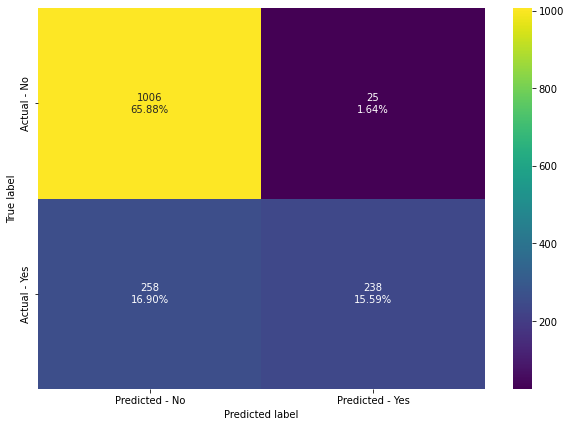

In [81]:
make_confusion_matrix(logreg, y_test)

## grid on Logreg

In [82]:
%%time
logreg = LogisticRegression()

#setting parameter, lasso ridge
params = {'penalty':['l1','l2'],'C':[0.5,1.0,25]}

#
grid_logreg = GridSearchCV(logreg, param_grid=params, cv = 5)

#fittig train data
grid_logreg.fit(X_train_sc,y_train)

#score of train data 


Wall time: 1.09 s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1.0, 25], 'penalty': ['l1', 'l2']})

In [83]:
get_metrics_score(grid_logreg)

Accuracy on training set :  0.8638405390230208
Accuracy on test set :  0.8447937131630648
Recall on training set :  0.6591695501730104
Recall on test set :  0.5987903225806451
Precision on training set :  0.8933177022274326
Precision on test set :  0.8865671641791045
Cross val score :  0.8590640118505444


[0.8638405390230208,
 0.8447937131630648,
 0.6591695501730104,
 0.5987903225806451,
 0.8933177022274326,
 0.8865671641791045]

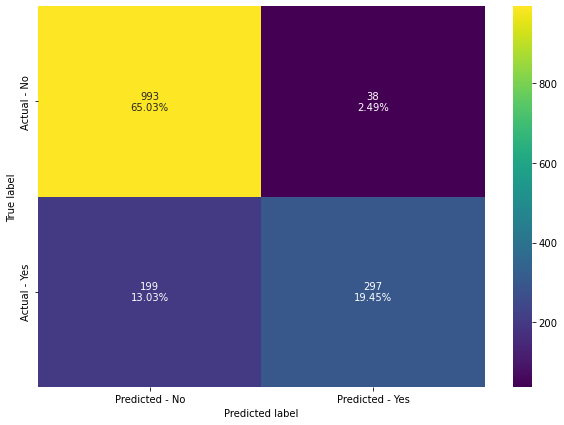

In [84]:

make_confusion_matrix(grid_logreg, y_test)

## KNN

In [85]:
knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)



KNeighborsClassifier()

In [86]:
get_metrics_score(knn)

Accuracy on training set :  0.9188658057271196
Accuracy on test set :  0.8631303208906352
Recall on training set :  0.8269896193771626
Recall on test set :  0.717741935483871
Precision on training set :  0.9148325358851674
Precision on test set :  0.8376470588235294
Cross val score :  0.8455926848101865


[0.9188658057271196,
 0.8631303208906352,
 0.8269896193771626,
 0.717741935483871,
 0.9148325358851674,
 0.8376470588235294]

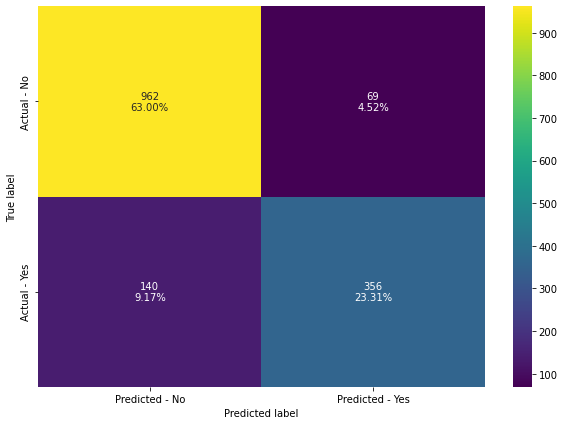

In [87]:

make_confusion_matrix(knn, y_test)

## Grid Search cv on knn

In [88]:
%%time
knn = KNeighborsClassifier()


param_knn = {
    'n_neighbors': [5, 10, 25],
    'weights': ['uniform', 'distance'],
    
}

grid_knn = GridSearchCV(knn, param_grid=param_knn,n_jobs = -1, cv=5)

grid_knn.fit(X_train_sc, y_train)

grid_knn.score(X_train_sc, y_train), grid_knn.score(X_test_sc, y_test)

Wall time: 4.61 s


(1.0, 0.8493778650949574)

In [89]:
#Calculating different metrics
get_metrics_score(grid_knn)

Accuracy on training set :  1.0
Accuracy on test set :  0.8493778650949574
Recall on training set :  1.0
Recall on test set :  0.6653225806451613
Precision on training set :  1.0
Precision on test set :  0.8375634517766497
Cross val score :  0.8528917219534489


[1.0, 0.8493778650949574, 1.0, 0.6653225806451613, 1.0, 0.8375634517766497]

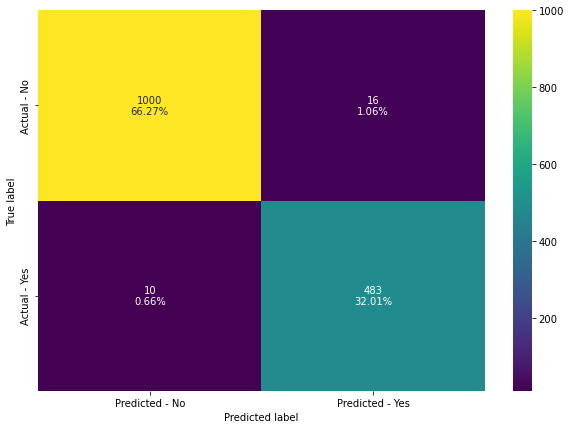

In [26]:


#Creating confusion matrix
make_confusion_matrix(grid_knn,y_test)

## Decision Tree

In [90]:
dt = DecisionTreeClassifier()
dt.fit(X_train_sc, y_train)


DecisionTreeClassifier()

In [91]:
get_metrics_score(dt)

Accuracy on training set :  1.0
Accuracy on test set :  0.971185330713818
Recall on training set :  1.0
Recall on test set :  0.9495967741935484
Precision on training set :  1.0
Precision on test set :  0.9612244897959183
Cross val score :  0.9696814378240383


[1.0, 0.971185330713818, 1.0, 0.9495967741935484, 1.0, 0.9612244897959183]

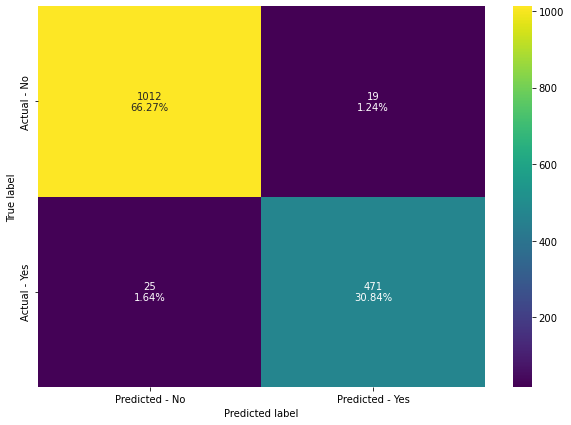

In [92]:

make_confusion_matrix(dt, y_test)

## GridSCV on Decision Tree

In [93]:
%%time
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier()

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_sc, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train_sc, y_train)


Wall time: 1min 32s


DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001)

In [94]:
%%time
get_metrics_score(dtree_estimator)

Accuracy on training set :  0.7299270072992701
Accuracy on test set :  0.7190569744597249
Recall on training set :  0.9256055363321799
Recall on test set :  0.9153225806451613
Precision on training set :  0.5498458376156218
Precision on test set :  0.539833531510107
Cross val score :  0.7285212821280552
Wall time: 252 ms


[0.7299270072992701,
 0.7190569744597249,
 0.9256055363321799,
 0.9153225806451613,
 0.5498458376156218,
 0.539833531510107]

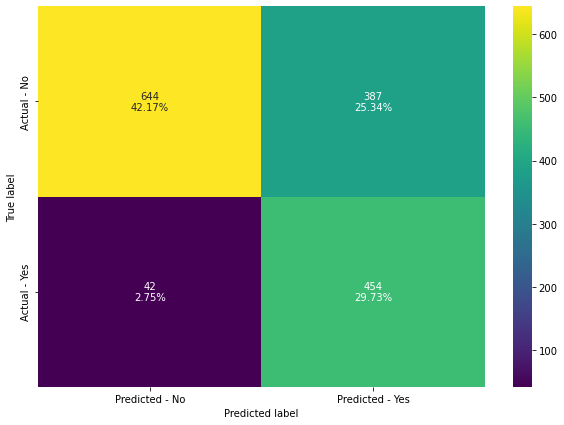

In [95]:


make_confusion_matrix(dtree_estimator,y_test)

## bagged decision trees

In [96]:
bgr = BaggingClassifier()
bgr.fit(X_train_sc, y_train)


BaggingClassifier()

In [97]:

%%time
get_metrics_score(bgr)

Accuracy on training set :  0.9997192588433464
Accuracy on test set :  0.9796987557301899
Recall on training set :  0.9991349480968859
Recall on test set :  0.9516129032258065
Precision on training set :  1.0
Precision on test set :  0.9853862212943633
Cross val score :  0.975009455221646
Wall time: 1.7 s


[0.9997192588433464,
 0.9796987557301899,
 0.9991349480968859,
 0.9516129032258065,
 1.0,
 0.9853862212943633]

In [98]:
y_test.value_counts()

no     1031
yes     496
Name: gdp_cat, dtype: int64

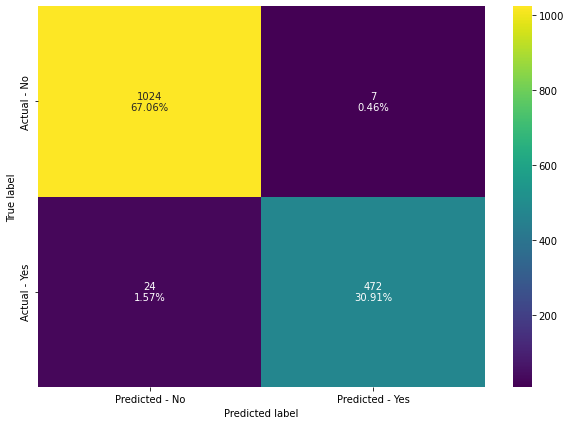

In [99]:

make_confusion_matrix(bgr, y_test)

## Grid Cv on bagged decision tree

In [100]:
%%time
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_sc, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_sc, y_train)

Wall time: 2min 35s


BaggingClassifier(max_features=0.7, max_samples=0.7, random_state=1)

In [101]:
#Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.99606962380685
Accuracy on test set :  0.9796987557301899
Recall on training set :  0.9922145328719724
Recall on test set :  0.9556451612903226
Precision on training set :  0.9956597222222222
Precision on test set :  0.9813664596273292
Cross val score :  0.97444962730668


[0.99606962380685,
 0.9796987557301899,
 0.9922145328719724,
 0.9556451612903226,
 0.9956597222222222,
 0.9813664596273292]

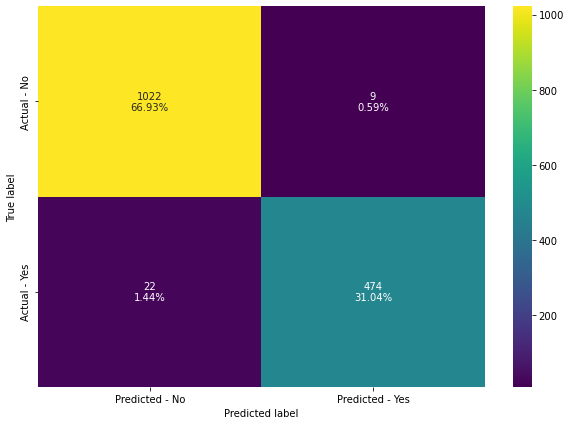

In [102]:


#Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

## Random Forest

In [103]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)


RandomForestClassifier()

In [104]:
get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9855926653569089
Recall on training set :  1.0
Recall on test set :  0.9717741935483871
Precision on training set :  1.0
Precision on test set :  0.9836734693877551
Cross val score :  0.9831543407346708


[1.0, 0.9855926653569089, 1.0, 0.9717741935483871, 1.0, 0.9836734693877551]

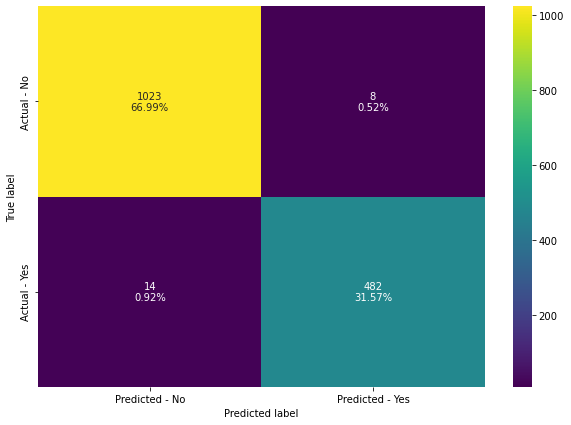

In [105]:

make_confusion_matrix(rf, y_test)

## GridSearchCv on Random Forest Classifier

In [106]:
%%time
rfc = RandomForestClassifier()
# setting paramiter
param_rfc = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [18, 20, 25],
    'max_depth': [4, 10, 20],
    'max_features': ['auto', 1.0, 2, 3]
    
}

# gridSearchCv
grid_rfc = GridSearchCV(rfc,param_grid= param_rfc,n_jobs = -1, cv = 5)

# fitting grid Search on Training data
grid_rfc.fit(X_train_sc, y_train)

Wall time: 21.3 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 10, 20],
                         'max_features': ['auto', 1.0, 2, 3],
                         'n_estimators': [18, 20, 25]})

In [107]:
#Calculating different metrics
get_metrics_score(grid_rfc)


Accuracy on training set :  0.9994385176866929
Accuracy on test set :  0.9836280288146693
Recall on training set :  0.9982698961937716
Recall on test set :  0.9616935483870968
Precision on training set :  1.0
Precision on test set :  0.9875776397515528
Cross val score :  0.9828726539231291


[0.9994385176866929,
 0.9836280288146693,
 0.9982698961937716,
 0.9616935483870968,
 1.0,
 0.9875776397515528]

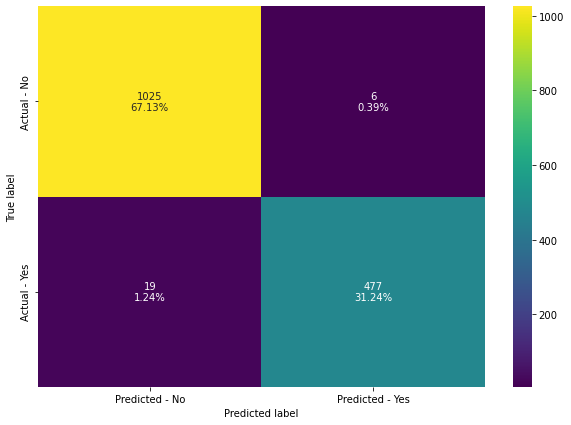

In [108]:

#Creating confusion matrix
make_confusion_matrix(grid_rfc,y_test)

## AdaBoost

In [109]:
ab = AdaBoostClassifier()
ab.fit(X_train_sc, y_train)


AdaBoostClassifier()

In [110]:
get_metrics_score(ab)

Accuracy on training set :  0.9483436271757439
Accuracy on test set :  0.9220694171578258
Recall on training set :  0.9065743944636678
Recall on test set :  0.8649193548387096
Precision on training set :  0.9323843416370107
Precision on test set :  0.8918918918918919
Cross val score :  0.9345808973005342


[0.9483436271757439,
 0.9220694171578258,
 0.9065743944636678,
 0.8649193548387096,
 0.9323843416370107,
 0.8918918918918919]

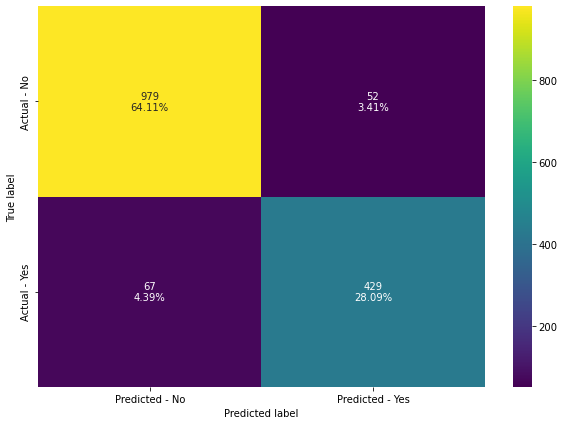

In [111]:

make_confusion_matrix(ab, y_test)

## Grid Search on Adaboost

In [112]:
%%time
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, n_jobs = -1,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_sc, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train_sc, y_train)

Wall time: 11min 37s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [113]:
#Calculating different metrics
get_metrics_score(abc_tuned)

Accuracy on training set :  0.742841100505334
Accuracy on test set :  0.7445972495088409
Recall on training set :  0.8927335640138409
Recall on test set :  0.8911290322580645
Precision on training set :  0.5657894736842105
Precision on test set :  0.5681233933161953
Cross val score :  0.7594012480892574


[0.742841100505334,
 0.7445972495088409,
 0.8927335640138409,
 0.8911290322580645,
 0.5657894736842105,
 0.5681233933161953]

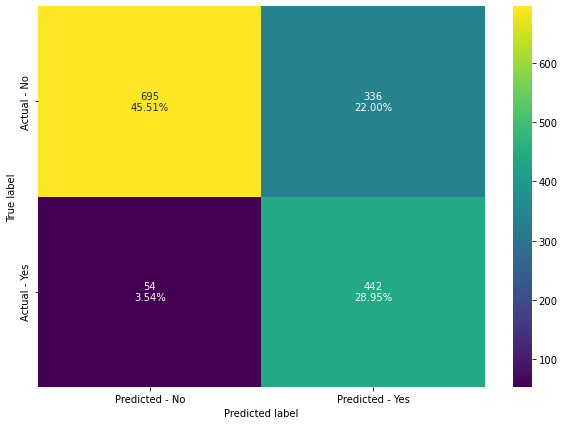

In [114]:


#Creating confusion matrix
make_confusion_matrix(abc_tuned,y_test)

## SVM

In [115]:
svc_= svm.SVC()

In [116]:

svc_.fit(X_train_sc, y_train)
get_metrics_score(svc_)


Accuracy on training set :  0.7650196518809658
Accuracy on test set :  0.7544204322200393
Recall on training set :  0.29411764705882354
Recall on test set :  0.2661290322580645
Precision on training set :  0.9418282548476454
Precision on test set :  0.9230769230769231
Cross val score :  0.7602447326536079


[0.7650196518809658,
 0.7544204322200393,
 0.29411764705882354,
 0.2661290322580645,
 0.9418282548476454,
 0.9230769230769231]

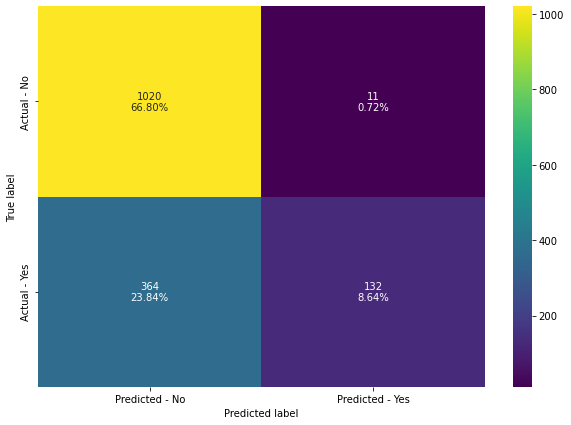

In [117]:

make_confusion_matrix(svc_, y_test)

## Gradient Boost

Wall time: 2.92 s


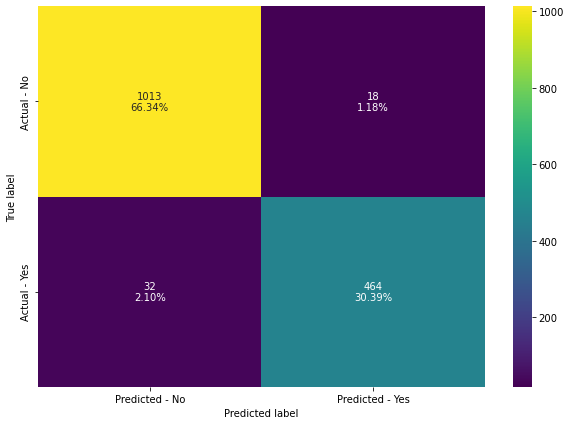

In [118]:
%%time
#Fitting the model
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train_sc,y_train)


#Creating confusion matrix
make_confusion_matrix(gbc,y_test)

In [119]:

#Calculating different metrics
get_metrics_score(gbc)

Accuracy on training set :  0.9896125772038181
Accuracy on test set :  0.9672560576293385
Recall on training set :  0.976643598615917
Recall on test set :  0.9354838709677419
Precision on training set :  0.9912203687445127
Precision on test set :  0.9626556016597511
Cross val score :  0.9637813795168382


[0.9896125772038181,
 0.9672560576293385,
 0.976643598615917,
 0.9354838709677419,
 0.9912203687445127,
 0.9626556016597511]

- The model is slightly overfitting the training data in terms of recall and precision but is giving very low recall on training and test data.
- The recall is better as compared to AdaBoost with default parameters but still not great.

# Grid Search

In [120]:
%%time
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,n_jobs = -1,cv=5)
grid_obj = grid_obj.fit(X_train_sc, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train_sc, y_train)

Wall time: 2min 39s


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.8)

In [121]:
#Calculating different metrics
get_metrics_score(gbc_tuned)


Accuracy on training set :  0.9921392476137002
Accuracy on test set :  0.9672560576293385
Recall on training set :  0.9818339100346021
Recall on test set :  0.9354838709677419
Precision on training set :  0.9938704028021016
Precision on test set :  0.9626556016597511
Cross val score :  0.965185479931292


[0.9921392476137002,
 0.9672560576293385,
 0.9818339100346021,
 0.9354838709677419,
 0.9938704028021016,
 0.9626556016597511]

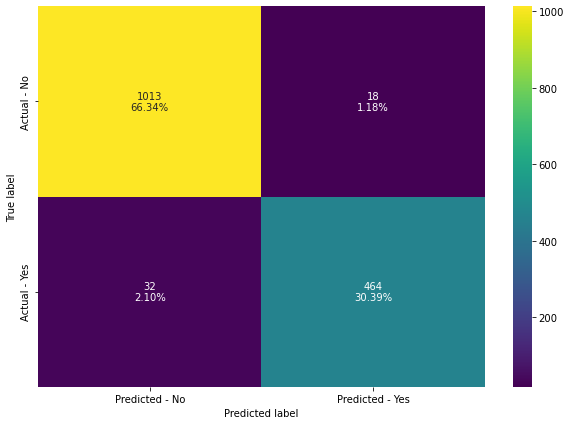

In [122]:

#Creating confusion matrix
make_confusion_matrix(gbc_tuned,y_test)

- The model performance has improved slightly after hyperparameter tuning but the model is still overfitting the training data.
- The test precision has decreased slightly and the test recall has increased slightly but still very low. 

In [128]:
y.value_counts(normalize=True)

no     0.675378
yes    0.324622
Name: gdp_cat, dtype: float64

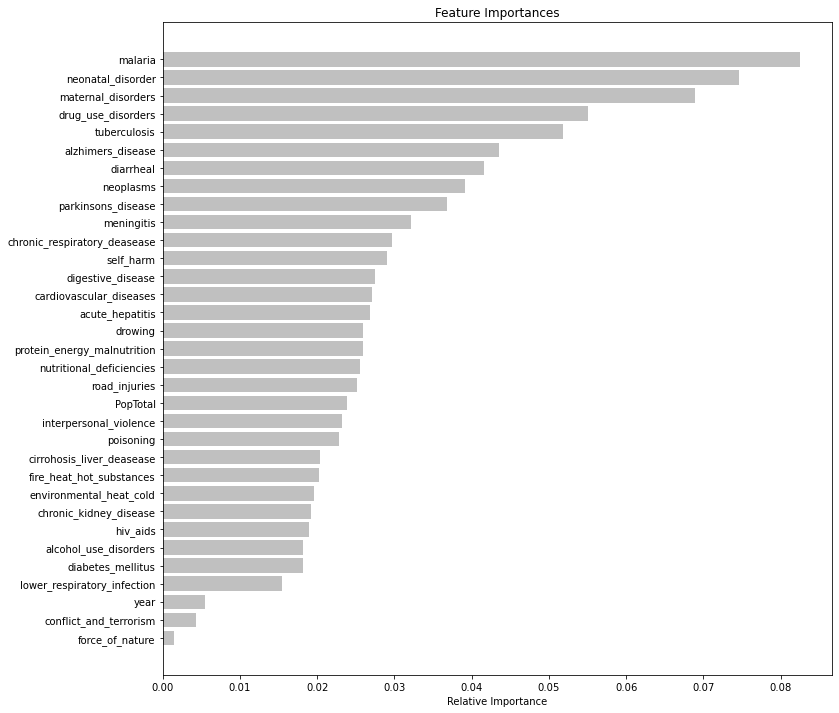

<Figure size 432x288 with 0 Axes>

In [133]:
feature_names = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='silver', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
plt.savefig('images/feature_importance.jpg', dpi = 250)

In [124]:
#result of models
model = pd.read_csv('datasets/classification.txt', delimiter=',')

In [125]:
model.head(15)

,model,train_score,test_score,recall_score_train,recall_score_test,precision_train,precision_test,cross_val_score
0,Logistic_Regression,0.835486,0.814669,0.548443,0.479839,0.908309,0.904943,0.827619
1,Tuned_logreg,0.863841,0.844794,0.659170,0.598790,0.893318,0.886567,0.859064
2,knn,0.918866,0.863130,0.826990,0.717742,0.914833,0.837647,0.845593
3,tuned_knn,1.000000,0.849378,1.000000,0.665323,1.000000,0.837563,0.852892
4,Decision_Tree,1.000000,0.971185,1.000000,0.949597,1.000000,0.961224,0.969681
5,tuned_decision_tree,0.729927,0.719057,0.925606,0.915323,0.549846,0.539834,0.728521
6,bagged_d_tree,0.999719,0.979699,0.999135,0.951613,1.000000,0.985386,0.975009
7,tuned_bagged_d_tree,0.996070,0.979699,0.992215,0.955645,0.995660,0.981366,0.974450
8,random_forest,1.000000,0.985593,1.000000,0.971774,1.000000,0.983673,0.983154
9,tuned_random_forest,0.999439,0.983628,0.998270,0.961694,1.000000,0.987578,0.982873


In [126]:
model.describe()

,train_score,test_score,recall_score_train,recall_score_test,precision_train,precision_test,cross_val_score
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.918754,0.889762,0.866782,0.804032,0.912471,0.880946,0.892137
std,0.103617,0.097243,0.208528,0.213882,0.149137,0.142224,0.092270
min,0.729927,0.719057,0.294118,0.266129,0.549846,0.539834,0.728521
25%,0.849663,0.829731,0.859862,0.691532,0.911571,0.862107,0.836606
50%,0.989613,0.922069,0.976644,0.915323,0.991220,0.923077,0.934581
75%,0.999579,0.975442,0.998702,0.950605,1.000000,0.972011,0.972066
max,1.000000,0.985593,1.000000,0.971774,1.000000,0.987578,0.983154


In [135]:
df.to_csv('datasets/classification.csv', index = False)